## Data Preprocessing 


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew



In [2]:
df=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

In [11]:
test=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

In [32]:
y_train = df['SalePrice']
test_id = test['Id']
all_data = pd.concat([df, test], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)


KeyError: ignored

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [4]:
len(df.columns)

81

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


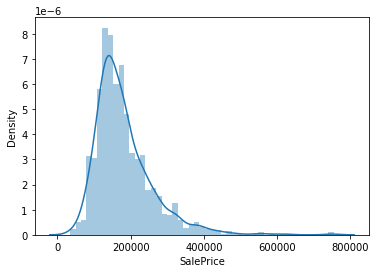

In [13]:
 sns.distplot(df['SalePrice'])


as we see the graph is skewed we need to normalise it first using log transformation


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


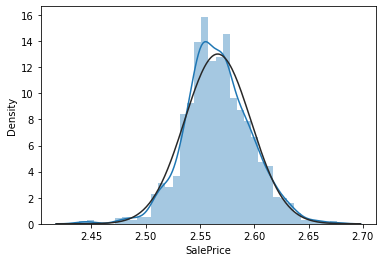

In [18]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.distplot(df['SalePrice'], fit=norm);



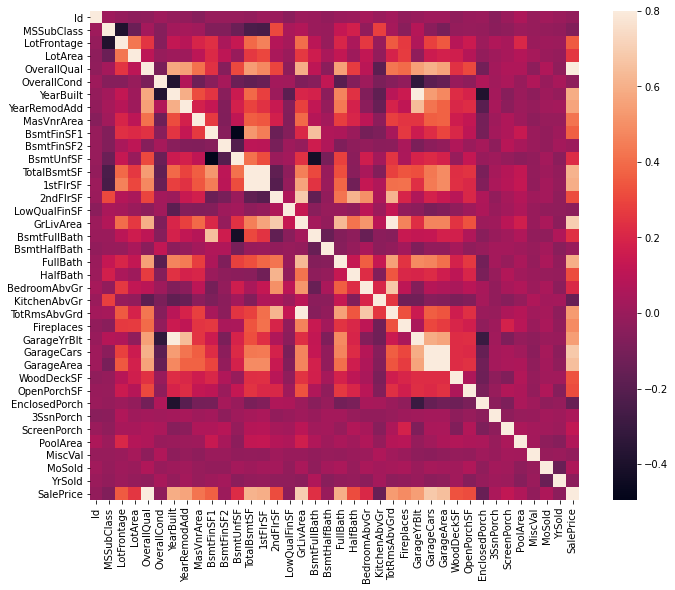

In [22]:
cor = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor, vmax=.8, square=True);


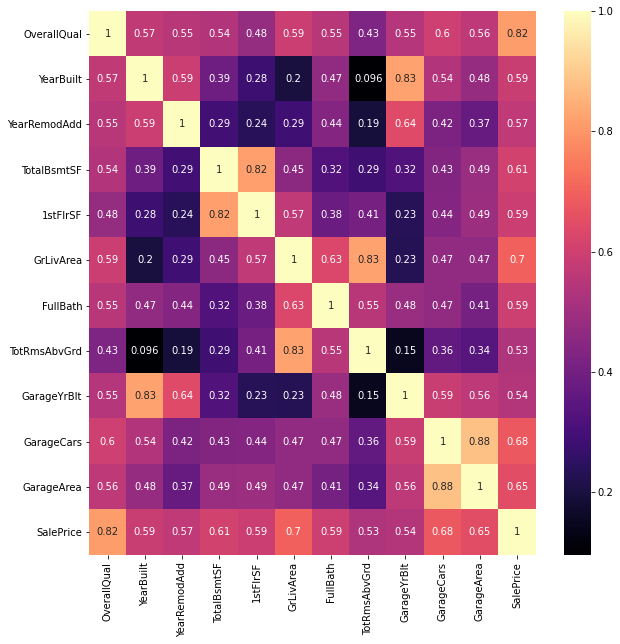

In [29]:
cor2 = df.corr()
highest_corr_features = cor2.index[abs(cor2["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[highest_corr_features].corr(),annot=True,cmap="magma")


This is basically the correlation among the cells having >0.5

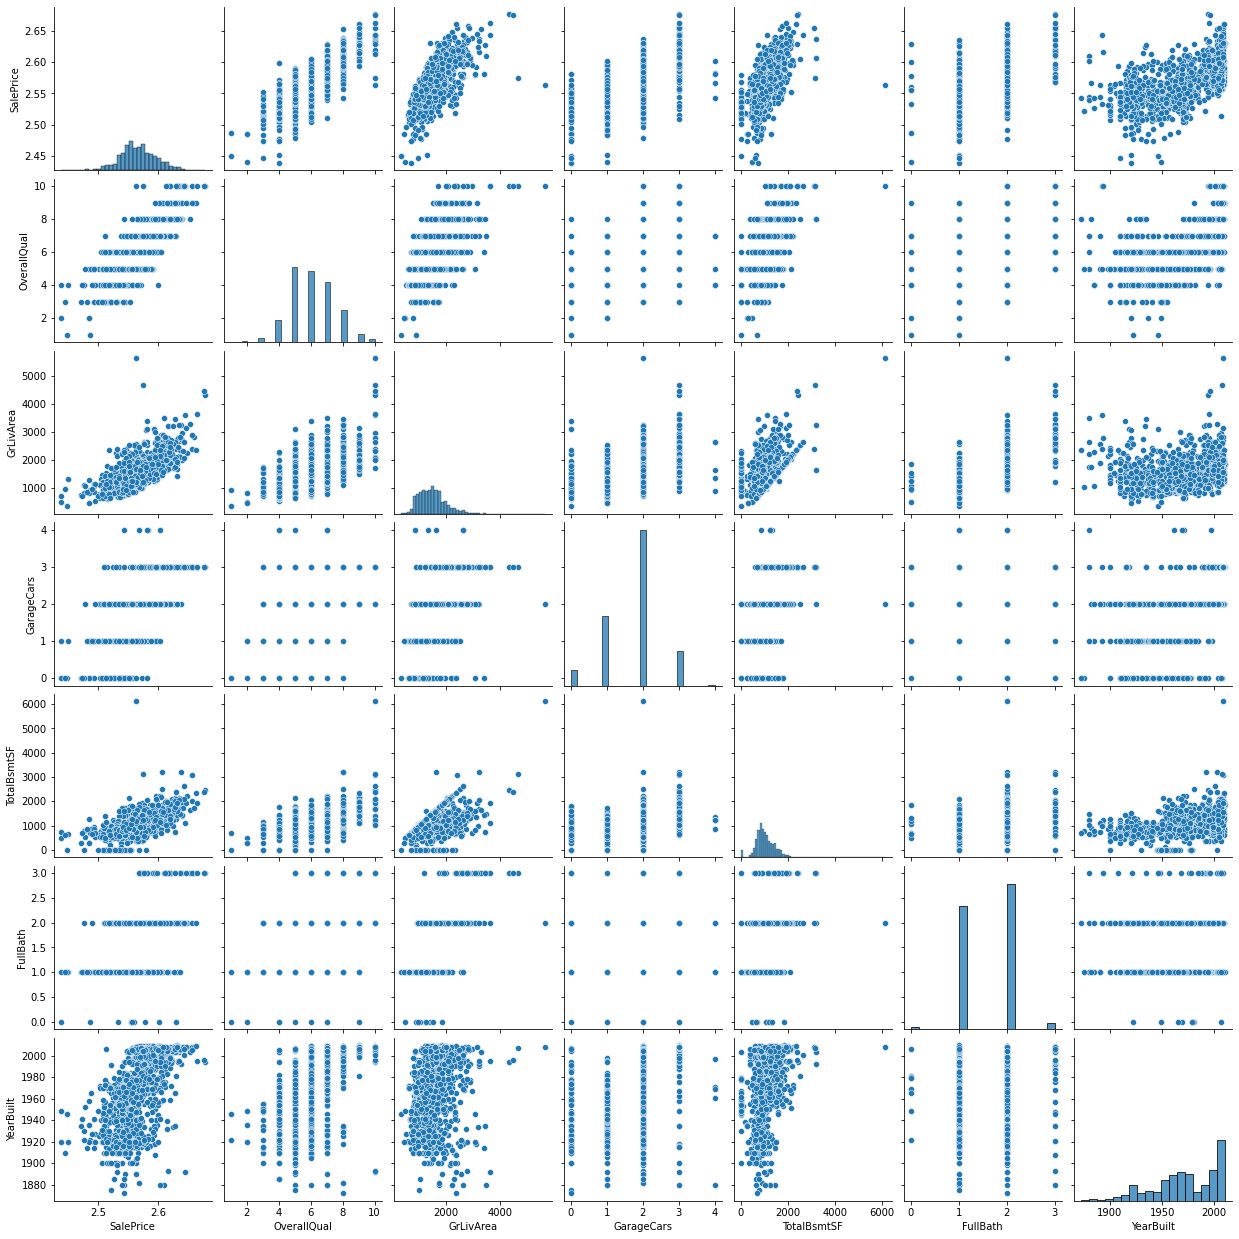

In [37]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])

In [31]:
cor2["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.815005
GrLivArea        0.697001
GarageCars       0.680156
GarageArea       0.649601
TotalBsmtSF      0.609138
FullBath         0.593950
1stFlrSF         0.593533
YearBuilt        0.587947
YearRemodAdd     0.566811
GarageYrBlt      0.542620
TotRmsAbvGrd     0.532015
Fireplaces       0.488470
MasVnrArea       0.425387
BsmtFinSF1       0.369589
LotFrontage      0.354315
WoodDeckSF       0.333100
OpenPorchSF      0.318779
2ndFlrSF         0.317684
HalfBath         0.314638
LotArea          0.255382
BsmtFullBath     0.235692
BsmtUnfSF        0.221007
BedroomAbvGr     0.211759
ScreenPorch      0.121453
PoolArea         0.068439
MoSold           0.057420
3SsnPorch        0.055326
BsmtFinSF2       0.006248
BsmtHalfBath    -0.003625
Id              -0.017318
MiscVal         -0.019939
OverallCond     -0.032208
YrSold          -0.037897
LowQualFinSF    -0.038467
MSSubClass      -0.072460
KitchenAbvGr    -0.147227
EnclosedPorch   -0.149860
Name: SalePr

Utilities is not present here

In [33]:
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [34]:
all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(all_data.isnull().sum().max())


4


This actually prints the max numnber of missing values we have in a cloumn

In [35]:
total = all_data.isnull().sum().sort_values(ascending=False)
total.head(20)

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
Exterior1st     1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
Exterior2nd     1
SaleType        1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
Electrical      1
YearBuilt       0
ExterQual       0
RoofMatl        0
RoofStyle       0
dtype: int64

Filling in numeric data

In [72]:
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)
#Filling values not available by zero

In [73]:
# print(all_data['Exterior2nd'][:5
# ])

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Shng
4    VinylSd
Name: Exterior2nd, dtype: object


FIlling in categorical data

In [55]:
all_data['Functional']

0       Typ
1       Typ
2       Typ
3       Typ
4       Typ
       ... 
1454    Typ
1455    Typ
1456    Typ
1457    Typ
1458    Typ
Name: Functional, Length: 2919, dtype: object

In [74]:
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])


In [75]:

all_data['Functional'] = all_data['Functional'].fillna('Typ')


In [ ]:
all_data.drop(['Utilities'], axis=1, inplace=True)

Dropping this because it has no correlaition with sales price

In [118]:
all_data.isnull().sum().max() #just checking that there's no missing data missing...


0

### Feature Engineering(fixing skewness in other features)

In [78]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index#data type is not object then store those data in numeric features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)#checks if skew ,yes then sorts in descendin order
high_skew = skewed_feats[abs(skewed_feats) > 0.5]#highly skewed classification
high_skew


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64

In [79]:
type(high_skew)

pandas.core.series.Series

In [89]:
all_data['LowQualFinSF']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    0.0
1457    0.0
1458    0.0
Name: LowQualFinSF, Length: 2919, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


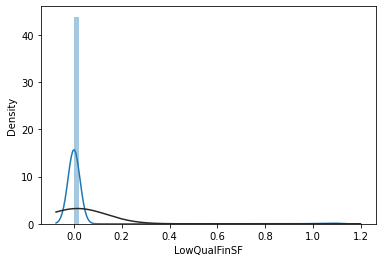

In [88]:
sns.distplot(all_data['LowQualFinSF'],fit=norm)

In [85]:
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])


We will try to add a new feature

In [90]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


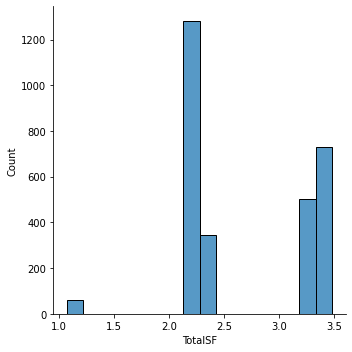

In [92]:
sns.displot(all_data['TotalSF'])

### Categorical to numerical data

In [93]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.967505,1.195975,7,0.706395,1.148069,2003,1.106252,0.0,1.027702,1.114530,1.114530,1.114431,0.0,1.142168,0.423036,0.000000,2,0.423036,3,0.423036,0.771165,0.000000,2.0,548.0,0.000000,0.968711,0.000000,0.0,0.0,0.0,0.0,2,2008,3.343492,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.874370,1.199786,6,0.771165,1.147568,1976,1.120099,0.0,1.062982,1.130416,1.130416,0.000000,0.0,1.130416,0.000000,0.423036,2,0.000000,3,0.423036,0.732569,0.423036,2.0,460.0,1.065460,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,2.260831,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.967505,1.204436,7,0.706395,1.148032,2002,1.089386,0.0,1.084045,1.117559,1.117559,1.115021,0.0,1.143805,0.423036,0.000000,2,0.423036,3,0.423036,0.732569,0.423036,2.0,608.0,0.000000,0.940202,0.000000,0.0,0.0,0.0,0.0,9,2008,3.350139,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.978567,1.199631,7,0.706395,1.146407,1970,1.048424,0.0,1.094260,1.109224,1.119373,1.109224,0.0,1.142322,0.423036,0.000000,1,0.000000,3,0.423036,0.753653,0.423036,3.0,642.0,0.000000,0.925237,1.060739,0.0,0.0,0.0,0.0,2,2006,3.337821,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0.967505,1.211219,8,0.706395,1.148013,2000,1.102955,0.0,1.089769,1.126529,1.126529,1.123133,0.0,1.151469,0.423036,0.000000,2,0.423036,4,0.423036,0.786048,0.423036,3.0,836.0,1.041904,0.991126,0.000000,0.0,0.0,0.0,0.0,12,2008,3.376192,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Seperating data back

In [94]:
x_train =all_data[:len(y_train)]
x_test = all_data[len(y_train):]


KeyError: ignored

In [95]:
x_test.shape , x_train.shape

((1459, 219), (1460, 219))

# Machine Learning

## Importing all modules

In [113]:
# Regression Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Classification Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Import all the boosting fns
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Import Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

# Import modules for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


## Middle work

In [97]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_CV_train(model):
    kf = KFold(5,shuffle=True,random_state=123).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(5,shuffle=True,random_state=123).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)


Using kfolds method to prevent overfitting as we use different batches of data

## Regresssion

### Linear

### Ridge

### Lasso

### ElasticNet


### Descision Tree Regressor

### Random Forest regressor

In [119]:
from xgboost.sklearn import XGBRegressor

param = {
    'colsample_bytree':range(0, 1), 'gamma':range(0, 1), 
                             'learning_rate':range(0, 1), 'max_depth':range(1,3), 
                             'min_child_weight':range(1,5), 'n_estimators':range(0, 2000),
                             'reg_alpha':range(0, 1), 'reg_lambda':range(0, 1),
                             'subsample':range(0, 1), 'random_state':[7] ,'nthread':[-1]}
xgb1=XGBRegressor()
xgb_random = RandomizedSearchCV(xgb1,param,n_jobs = 5,cv = 2)


In [121]:
xgb_random

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'colsample_bytree': range(0, 1),
                                        'gamma': range(0, 1),
                                        'learning_rat

In [120]:
xgb_random.fit(x_train, y_train)
y_predict = np.floor(np.expm1(the_model.predict(x_test)))
y_predict

ValueError: ignored

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission.csv',index=False)

In [104]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(x_train, y_train)
print(rmse_CV_train(the_model))
# rmse_CV_test(rmse_CV_test))

[03:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.01797805 0.02095667 0.02030659 0.01854586 0.01885282]


In [99]:
y_predict = np.floor(np.expm1(the_model.predict(x_test)))
y_predict

array([11., 11., 12., ..., 11., 11., 12.], dtype=float32)

In [100]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission.csv',index=False)

### SVR

### MARS

### Gradient Boost Regressor

### Adaboost Regressor

## Classification

### Logistic Regression

### Descision Trees

### Random Forests

##### XG Boost

##### AdaBoost

##### LGBM

### SVM

### KNN

### K-Means Clustering (Unsupervised)

## Save the model

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

# Deep Learning

## Importing all modules

In [ ]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

#preprocessing (remove after done)
from sklearn.preprocessing import StandardScaler

#CNN
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

#RNN
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D

#Classification Imports
from sklearn.metrics import confusion_matrix

#Recommender Systems
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from sklearn.utils import shuffle

## Transfer Learning
## Data augumentation
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os
from sklearn.linear_model import LogisticRegression


#Other imports
#import itertools
# from mpl_toolkits.mplot3d import Axes3D


## ANN

### Regression

### Classification

## CNN

### Regression

### Classification

### Transfer Learning

## RNN

### Regression

### Classification

## Save the model